<a href="https://colab.research.google.com/github/sunn-e/HPRTracker-tinyYolov3/blob/master/final_collab_tinyyolov3_rocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -rf darknet

In [28]:
!git clone https://github.com/sunn-e/darknet.git

remote: Total 14010 (delta 4), reused 8 (delta 2), pack-reused 13998
Receiving objects: 100% (14010/14010), 251.00 MiB | 35.51 MiB/s, done.
Resolving deltas: 100% (8653/8653), done.
Checking out files: 100% (4545/4545), done.
Cloning into 'darknet'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14010 (delta 4), reused 8 (delta 2), pack-reused 13998
Receiving objects: 100% (14010/14010), 251.00 MiB | 34.36 MiB/s, done.
Resolving deltas: 100% (8649/8649), done.
Checking out files: 100% (4545/4545), done.


In [29]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile


/content/darknet/darknet


In [30]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [31]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/

In [33]:
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/person.jpg

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 ma

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

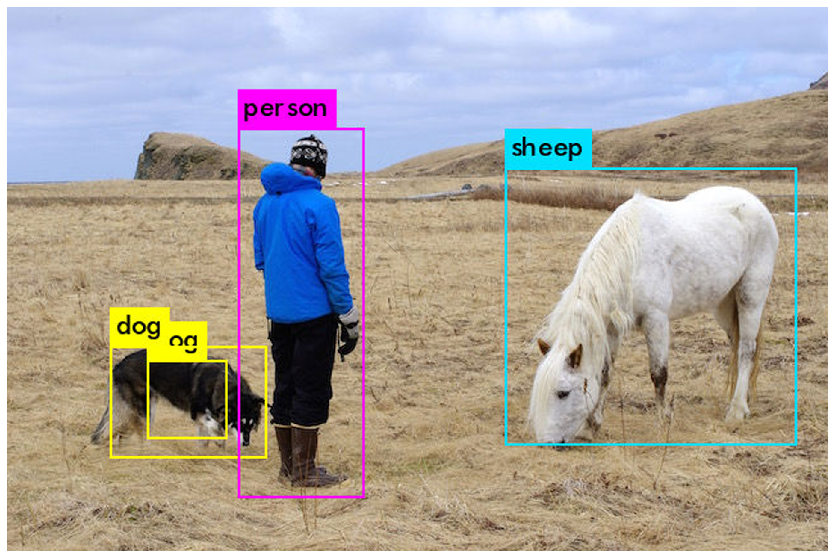

In [35]:
imShow('predictions.jpg')

In [36]:
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/dog.jpg


 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 ma

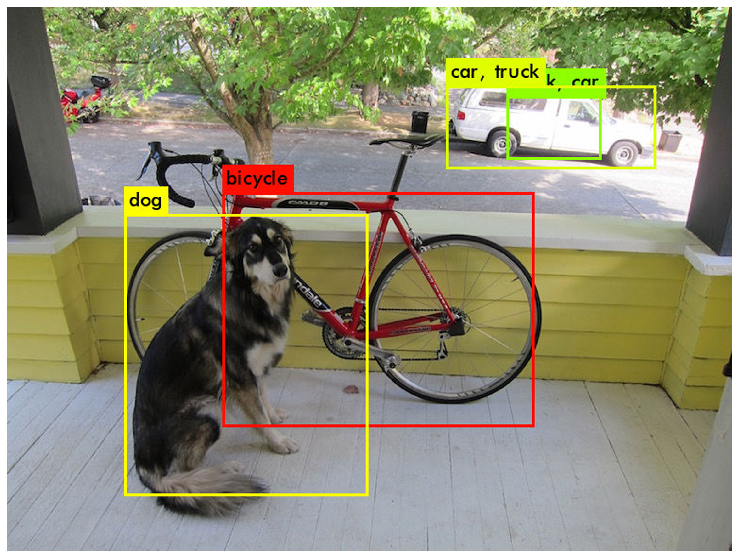

In [37]:
imShow('predictions.jpg')

In [44]:
#!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15
!wget https://github.com/sunn-e/darknet/blob/master/build/darknet/x64/yolov3-tiny.conv.15

--2020-03-12 11:18:36--  https://github.com/sunn-e/darknet/blob/master/build/darknet/x64/yolov3-tiny.conv.15
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3-tiny.conv.15.1’

yolov3-tiny.conv.15     [ <=>                ]  64.79K  --.-KB/s    in 0.01s   

2020-03-12 11:18:37 (5.32 MB/s) - ‘yolov3-tiny.conv.15.1’ saved [66346]



In [39]:
%cd data 
!wget https://github.com/sunn-e/darknet/blob/master/build/darknet/x64/data/obj.data
%cd ..

/content/darknet/darknet/data
--2020-03-12 11:13:45--  https://github.com/sunn-e/darknet/blob/master/build/darknet/x64/data/obj.data
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘obj.data.1’

obj.data.1              [ <=>                ]  65.03K  --.-KB/s    in 0.02s   

2020-03-12 11:13:46 (3.94 MB/s) - ‘obj.data.1’ saved [66590]

/content/darknet/darknet


In [40]:
%cd cfg
!wget https://github.com/sunn-e/darknet/blob/master/build/darknet/x64/yolov3-tiny-obj.cfg
%cd ..

/content/darknet/darknet/cfg
--2020-03-12 11:13:49--  https://github.com/sunn-e/darknet/blob/master/build/darknet/x64/yolov3-tiny-obj.cfg
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3-tiny-obj.cfg’

yolov3-tiny-obj.cfg     [ <=>                ] 101.68K  --.-KB/s    in 0.01s   

2020-03-12 11:13:49 (6.88 MB/s) - ‘yolov3-tiny-obj.cfg’ saved [104119]

/content/darknet/darknet


Trick for collab to keep running. Don't want to lose weights file.
(CTRL + SHIFT + i) to open up the inspector view on browser.

Paste code into console window and hit Enter
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```





 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3-tiny-obj


In [56]:
!./darknet detector train data/obj.data build/darknet/x64/yolov3-tiny-obj.cfg yolov3-tiny.conv.15 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.749239, GIOU: 0.738818), Class: 0.996914, Obj: 0.586540, No Obj: 0.001847, .5R: 0.941176, .75R: 0.411765, count: 17, class_loss = 0.208220, iou_loss = 0.127941, total_loss = 0.336161 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.676442, GIOU: 0.660077), Class: 0.998862, Obj: 0.519718, No Obj: 0.000467, .5R: 0.925926, .75R: 0.296296, count: 27, class_loss = 0.343459, iou_loss = 0.189867, total_loss = 0.533326 

 4741: 0.432318, 0.489411 avg loss, 0.001000 rate, 0.896917 seconds, 303424 images
Loaded: 0.147492 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.794660, GIOU: 0.786629), Class: 0.998663, Obj: 0.619775, No Obj: 0.001806, .5R: 1.000000, .75R: 0.687500, count: 16, class_loss = 0.158363, iou_loss = 0.123134, total_loss = 0.281497 
v3 (mse loss, Normalizer: (

# New Section

In [0]:
#./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]

In [57]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-tiny-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-tiny-obj.cfg
%cd ..


/content/darknet/darknet/cfg
/content/darknet/darknet


 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 ma

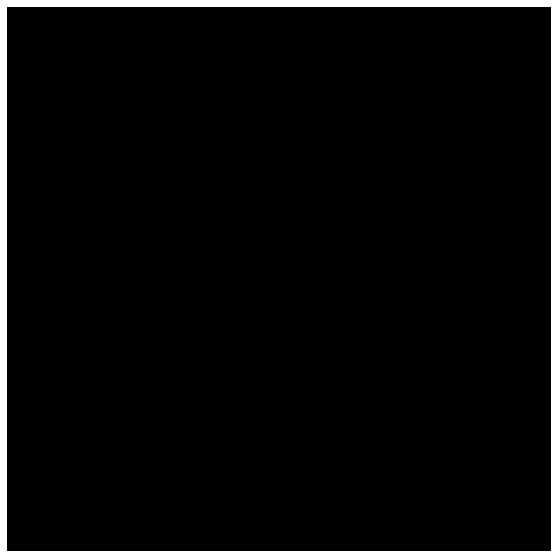

In [58]:
!./darknet detector test data/obj.data build/darknet/x64/yolov3-tiny-obj.cfg yolov3-tiny.weights /data/obj/00e3e8a9ad22f762.jpg -thresh 0.3
imShow('predictions.jpg')

In [0]:
from google.colab import files
files.download('example.txt') 